<a href="https://colab.research.google.com/github/brioglade/gmt/blob/main/%E7%BB%99%E7%82%B9%E8%B4%9F%E6%8C%87%E6%95%B0%E6%8B%9F%E5%90%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 1.17656914e+02  3.39205411e+02  9.71144670e-04 -1.16849936e+00]


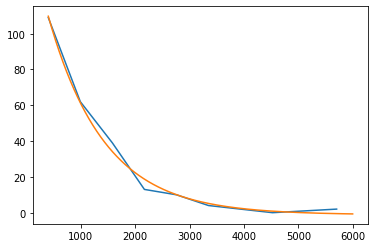

In [ ]:
from pylab import *
from scipy.optimize import curve_fit

x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

def func(x, a, b, c, d):
    return a*np.exp(-c*(x-b))+d

popt, pcov = curve_fit(func, x, y, [100,400,0.001,0])
print (popt)

plot(x,y)
x=linspace(400,6000,10000)
plot(x,func(x,*popt))
show()

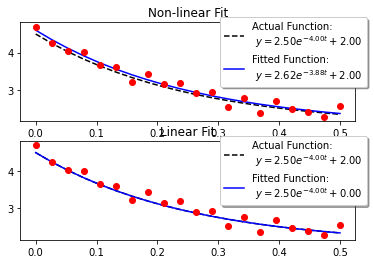

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize


def main():
    # Actual parameters
    A0, K0, C0 = 2.5, -4.0, 2.0

    # Generate some data based on these
    tmin, tmax = 0, 0.5
    num = 20
    t = np.linspace(tmin, tmax, num)
    y = model_func(t, A0, K0, C0)

    # Add noise
    noisy_y = y + 0.5 * (np.random.random(num) - 0.5)

    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(t, noisy_y)
    fit_y = model_func(t, A, K, C)
    plot(ax1, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, C0))
    ax1.set_title('Non-linear Fit')

    # Linear Fit (Note that we have to provide the y-offset ("C") value!!
    A, K = fit_exp_linear(t, y, C0)
    fit_y = model_func(t, A, K, C0)
    plot(ax2, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, 0))
    ax2.set_title('Linear Fit')

    plt.show()

def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, noisy_y, fit_y, orig_parms, fit_parms):
    A0, K0, C0 = orig_parms
    A, K, C = fit_parms

    ax.plot(t, y, 'k--', 
      label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

if __name__ == '__main__':
    main()